In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load your training dataset
train_data = pd.read_excel('/content/drive/MyDrive/Resolute AI/Task1and2/train.xlsx')

# Load your test dataset
test_data = pd.read_excel('/content/drive/MyDrive/Resolute AI/Task1and2/test.xlsx')

# Preview the data
print(train_data.head())
print(test_data.head())

   T1  T2  T3  T4  T5  T6  T7  T8  T9  T10  T11  T12  T13  T14  T15  T16  T17  \
0 -70 -61 -66 -53 -51 -63 -82 -57 -76  -78  -66  -66  -61  -59  -73  -75  -63   
1 -77 -74 -71 -76 -65 -63 -66 -52 -55  -75  -72  -75  -74  -61  -64  -63  -53   
2 -53 -38 -55 -66 -62 -62 -65 -70 -62  -52  -56  -53  -66  -68  -72  -60  -68   
3 -72 -62 -59 -65 -65 -65 -78 -82 -83  -59  -84  -60  -64  -83  -69  -72  -95   
4 -67 -69 -65 -63 -59 -53 -70 -72 -71  -60  -61  -57  -54  -76  -61  -66  -71   

   T18 target  
0  -77    B37  
1  -63    B61  
2  -77    A19  
3  -73    A22  
4  -80    A33  
   T1  T2  T3  T4  T5  T6  T7  T8  T9  T10  T11  T12  T13  T14  T15  T16  T17  \
0 -76 -83 -70 -66 -64 -72 -64 -69 -60  -76  -83  -78  -81  -81  -81  -70  -60   
1 -58 -57 -78 -81 -73 -73 -78 -78 -82  -49  -55  -58  -66  -79  -72  -83  -74   
2 -70 -70 -71 -69 -69 -68 -61 -55 -53  -82  -87  -76  -68  -57  -64  -75  -57   
3 -71 -61 -56 -56 -61 -60 -68 -66 -72  -58  -55  -56  -58  -62  -61  -59  -64   
4 -72 -71 -6

In [6]:
# Check the column names in the training and test data
print("Training Data Columns:")
print(train_data.columns)

print("\nTest Data Columns:")
print(test_data.columns)


Training Data Columns:
Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11',
       'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'target'],
      dtype='object')

Test Data Columns:
Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11',
       'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18'],
      dtype='object')


In [7]:
# Clean column names
train_data.columns = train_data.columns.str.strip().str.replace('`', '', regex=True)
test_data.columns = test_data.columns.str.strip().str.replace('`', '', regex=True)


In [9]:
# Handle missing values if any
train_data = train_data.dropna()
test_data = test_data.dropna()

# Separate features and target variable for training data
X_train = train_data.drop(columns=['target'])  # Adjust if your target column has a different name
y_train = train_data['target']  # Adjust accordingly

# Prepare test data without dropping the target since it doesn't exist
X_test = test_data  # No target column in test data

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Logistic Regression

In [10]:
# Train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_log_reg = log_reg.predict(X_test_scaled)
train_accuracy_log_reg = accuracy_score(y_train, log_reg.predict(X_train_scaled))

print(f'Logistic Regression Train Accuracy: {train_accuracy_log_reg}')


Logistic Regression Train Accuracy: 0.9774978232477144


Decision Tree Classifier

In [11]:
# Train the model
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_tree = tree_clf.predict(X_test_scaled)
train_accuracy_tree = accuracy_score(y_train, tree_clf.predict(X_train_scaled))

print(f'Decision Tree Train Accuracy: {train_accuracy_tree}')


Decision Tree Train Accuracy: 0.9994286025250326


Random Forest Classifier

In [12]:
# Train the model
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_forest = forest_clf.predict(X_test_scaled)
train_accuracy_forest = accuracy_score(y_train, forest_clf.predict(X_train_scaled))

print(f'Random Forest Train Accuracy: {train_accuracy_forest}')


Random Forest Train Accuracy: 0.9994286025250326


In [13]:
# Save the predictions
test_data['LogisticRegression_Predictions'] = y_pred_log_reg
test_data['DecisionTree_Predictions'] = y_pred_tree
test_data['RandomForest_Predictions'] = y_pred_forest

# Save to Excel
test_data.to_excel('test_prediction_Result_Task2.xlsx', index=False)
print(test_data[['LogisticRegression_Predictions', 'DecisionTree_Predictions', 'RandomForest_Predictions']])


      LogisticRegression_Predictions DecisionTree_Predictions  \
0                                B74                      B74   
1                                A10                      A10   
2                                B65                      B65   
3                                B20                      B20   
4                                A67                      A67   
...                              ...                      ...   
15747                            A71                      A71   
15748                            B11                      B11   
15749                            B69                      B69   
15750                            A38                      A38   
15751                            A80                      A80   

      RandomForest_Predictions  
0                          B74  
1                          A10  
2                          B65  
3                          B20  
4                          A67  
...                  

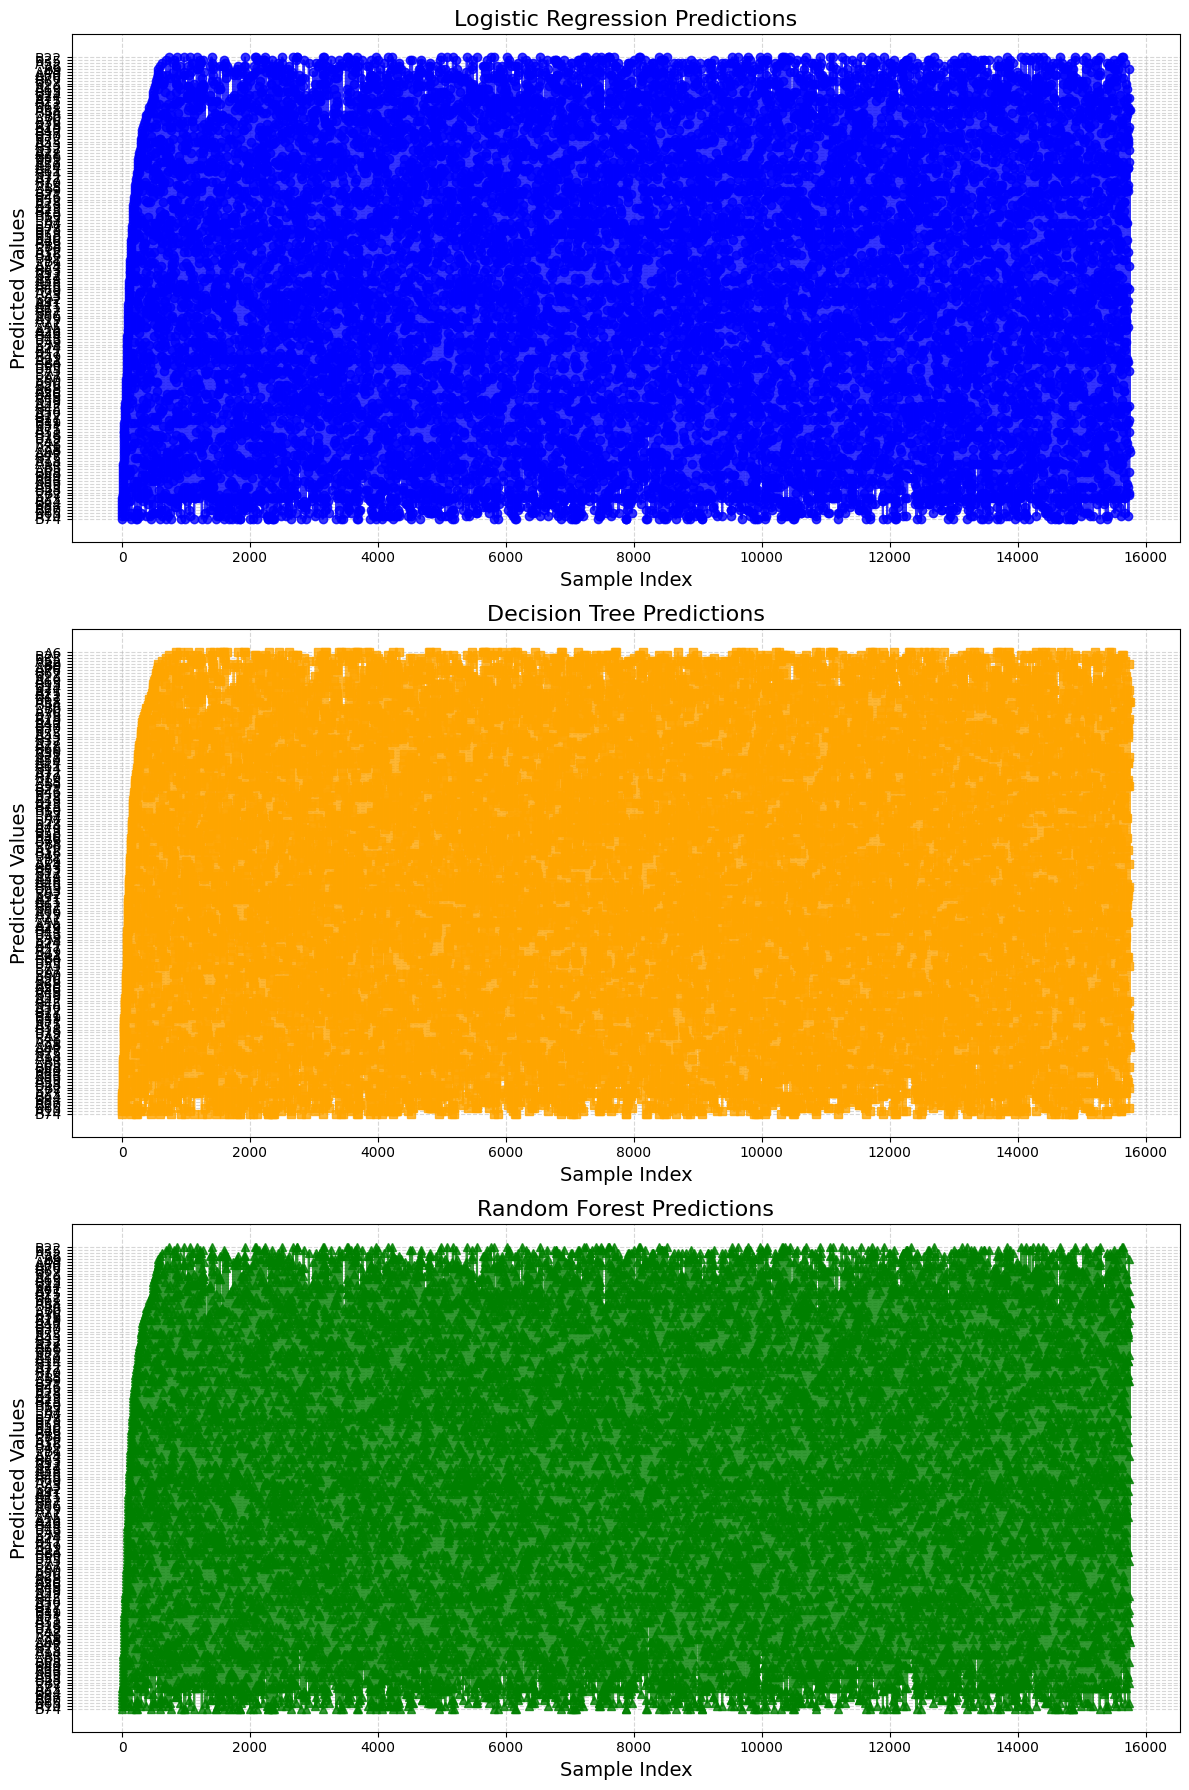

In [17]:
import matplotlib.pyplot as plt

# Set up the figure with subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot Logistic Regression Predictions
axs[0].plot(test_data['LogisticRegression_Predictions'], label='Logistic Regression', linestyle='-', marker='o', color='blue', alpha=0.8)
axs[0].set_title('Logistic Regression Predictions', fontsize=16)
axs[0].set_xlabel('Sample Index', fontsize=14)
axs[0].set_ylabel('Predicted Values', fontsize=14)
axs[0].grid(True, linestyle='--', alpha=0.5)

# Plot Decision Tree Predictions
axs[1].plot(test_data['DecisionTree_Predictions'], label='Decision Tree', linestyle='-', marker='s', color='orange', alpha=0.8)
axs[1].set_title('Decision Tree Predictions', fontsize=16)
axs[1].set_xlabel('Sample Index', fontsize=14)
axs[1].set_ylabel('Predicted Values', fontsize=14)
axs[1].grid(True, linestyle='--', alpha=0.5)

# Plot Random Forest Predictions
axs[2].plot(test_data['RandomForest_Predictions'], label='Random Forest', linestyle='-', marker='^', color='green', alpha=0.8)
axs[2].set_title('Random Forest Predictions', fontsize=16)
axs[2].set_xlabel('Sample Index', fontsize=14)
axs[2].set_ylabel('Predicted Values', fontsize=14)
axs[2].grid(True, linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()
